# 간단한 컨브넷 만들기

In [ ]:
from keras import layers
from keras import models

# 간단한 컨브넷 작성
# 이미지 특징 추출 층(합성곱 기반 층)
model = models.Sequential()
# 필터 수, 패치 사이즈(3X3), 요소별 적용할 활성화 함수, 입력 특성 맵 사이즈
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
# activation='relu': 음수, 0은 모두 0으로 만들고, 양수 값만 남긴다.
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten()) # 특성공학 결과물 1차원 텐서(벡터)로 변환하는 중

# 완전 연결 분류기
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 출력층: 최상위층, 분류 결과물 확률 꼴로 변환.

# 모델 설계 결과 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
# MNIST 숫자 이미지 합성곱 신경망으로 분류
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)) # 6만개 배치, 높이 28, 너비 28, 채널 1사이즈로 크기 조정
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1)) # 1만개 배치, 높이 28, 너비 28, 채널 1사이즈로 크기 조정
test_images = test_images.astype('float32') / 255 # 전부 부동소수점 실수로 변환 + 1 / 255 로 스케일 조정

train_labels = to_categorical(train_labels) # train_label 들을 모두 원핫 인코딩 벡터로 변환 # 분류 결과와 크로스엔트로피 비교하기 위함
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 모델 컴파일
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# 모델 학습
model.fit(
    train_images,
    train_labels,
    epochs = 30,
    batch_size=64,
    validation_data = (test_images, test_labels)
)

test_loss, test_acc = model.evaluate(test_images, test_labels) ; print(test_acc)


Epoch 1/5
938/938 [==============================] - 58s 61ms/step - loss: 0.1716 - accuracy: 0.9471 - val_loss: 0.0540 - val_accuracy: 0.9831
Epoch 2/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0400 - val_accuracy: 0.9869
Epoch 3/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0329 - val_accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0235 - accuracy: 0.9930 - val_loss: 0.0294 - val_accuracy: 0.9906
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.0286 - accuracy: 0.9918
0.9918000102043152


# 간단한 컨브넷 밑바닥 부터 훈련시키기

In [ ]:
pwd


'/content'

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

!unzip -qq "/content/drive/MyDrive/cats_and_dogs_small-20230105T072819Z-001"

/content/drive/MyDrive
replace cats_and_dogs_small/train/cats/cat.742.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# 네트워크 구성

from keras import layers
from keras import models

model = models.Sequential()
# 입력 특성 맵에 적용 할 필터 수: 32, 윈도우 사이즈, 활성화함수, 입력 데이터 규격: 150*150, RGB 3채널
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2))) # 최대 풀링 연산 적용할 윈도우 사이즈 - 다운샘플링(크기 축소)
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2))) # 윈도우 사이즈
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2))) # 윈도우 사이즈
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2))) # 윈도우 사이즈
# 여기까지 합성곱 기반 층(지역 패턴 추출 층)

# 여기서부터 완전 연결 층(전역 패턴 추출, 분류기)
model.add(layers.Flatten()) #  1차원 텐서(벡터)로 변환
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 출력층: 최상위층, 분류 결과물 확률 꼴로 변환.

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# 모델 컴파일

from keras import optimizers

model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.adam_v2.Adam(learning_rate=0.001),
    metrics=['acc']
)

# 데이터 전처리

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_and_dogs_small/train',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

valid_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_and_dogs_small/test',
    target_size = (150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 모델 훈련
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs = 1,
    validation_data = valid_generator,
    validation_steps = 50
)

<ipython-input-12-172f576b4c85>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 141s 1s/step - loss: 7.7055e-05 - acc: 1.0000 - val_loss: 2.6214 - val_acc: 0.7270


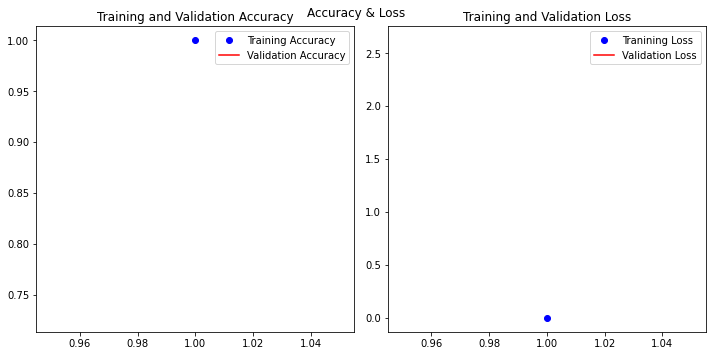

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Tranining Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.suptitle('Accuracy & Loss')
plt.tight_layout()

plt.show()


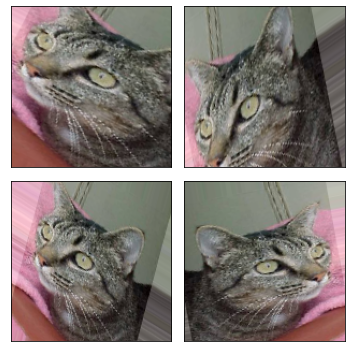

In [ ]:
# 데이터 증식
import os
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'

)

# 데이터 증식 결과 시각화해서 살펴보기
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join('/content/drive/MyDrive/cats_and_dogs_small/train/cats', fname) for fname in os.listdir('/content/drive/MyDrive/cats_and_dogs_small/train/cats')])
img_path = fnames[7]

img = image.load_img(img_path, target_size = (150, 150)) # 이미지 읽어오기, 크기 150 * 150으로 변환

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

plt.figure(figsize=(5,5))
i = 1
for batch in datagen.flow(x,batch_size=1) :
    plt.subplot(2,2,i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i == 5 : break
plt.tight_layout() 
plt.show()


In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# 모델 컴파일
model.compile(
    loss = 'binary_crossentropy'
    metrics = ['acc'],
    optimizer = optimizers.adam_v2.Adam(Ir = 0.001 )
)



In [ ]:
from keras.models import load_model

model2 = load_model('/content/drive/MyDrive/학습된 가중치/cats_and_dogs_with_augmentation.h5')
model2.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
img_path = '/content/다운로드2.jpg'
import numpy as np
import keras.utils as image

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)

img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(img_tensor[0])
plt.xticks([])
plt.yticks([])
plt.show()

NameError: ignored

In [ ]:
from keras import models

layer_outputs = [layer.output for layer in  model2.layers[:8]]

activation_model = models.Model(inputs=model2.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 98ms/step


(1, 148, 148, 32)


<Figure size 144x144 with 0 Axes>

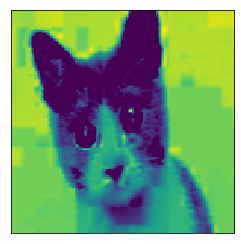

In [ ]:
first_layer_activation_result = activations[0]
print(first_layer_activation_result.shape)

plt.figure(figsize=(2,2))
plt.matshow(first_layer_activation_result[0, :, :,31], cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ["COLAB_TPU_ADDR"])

tf.config.experimental_connect_to_cluster(resolver)
tf.config.experimental_initialize_tpu_system(resolver)

KeyError: ignored

In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.applications.imagenet_utils import preprocess_input

#1: RGB
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')

#2: default mode 'caffe' style, BGR
X = x_train.copy()
Y1 = preprocess_input(X)
del X



170498071/170498071 [==============================] - 4s 0us/step


# 사전학습 모델1: VGG 모델

553467096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

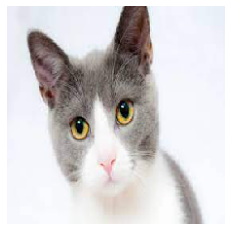

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

from tensorflow.keras.preprocessing import image


#2:
model = VGG16(weights='imagenet', include_top=True)
model.summary()

img_path = '/content/다운로드2.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
output = model.predict(x)

print("Predicted:", decode_predictions(output, top=5)[0])

plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
#2
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3 
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

model = VGG16(weights=None, include_top=True, classes=10, input_shape=(32,32,3))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
#5: train and evaluate the model
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400, validation_split=0.2, verbose=0)